In [0]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_dataset = fetch_20newsgroups(subset='all')

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
phi = vectorizer.fit_transform(newsgroups_dataset.data).transpose()

Converted collection of text documents to matrix of token counts, we transposed the matrix so that the input is in correct form.

In [9]:
phi.shape

(173762, 18846)

In [0]:
import numpy as np
m = 173762
k = 2
theta = np.random.rand(m, k) 
theta,_= np.linalg.qr(theta)
phi_transpose = phi.transpose()

Taking QR factorization and only the orthogonal matrix into input. Theta is m * k, m = 173762 and k = 2. It is randomly initialized. We applied 20 iterations.

In [0]:
for i in range (1,20):
  temp = phi_transpose @ theta
  theta = phi @ temp
  theta,_ = np.linalg.qr(theta)

In [12]:
y = theta.transpose() @ phi
y.shape

(2, 18846)

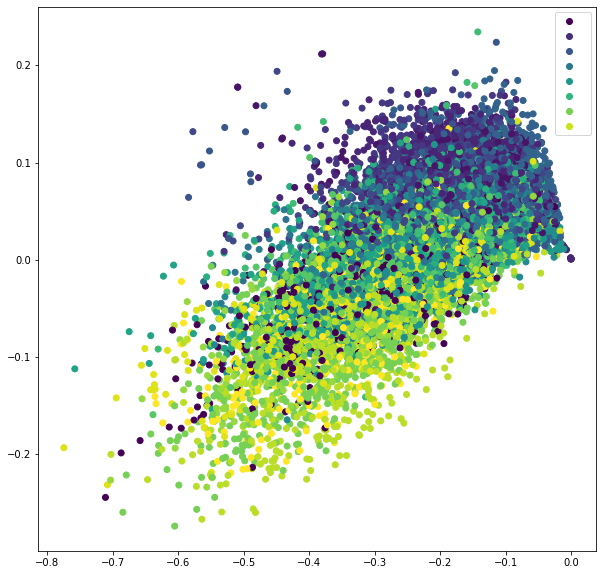

In [15]:
target = newsgroups_dataset.target
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
scatter = plt.scatter(y[0,:], y[1,:], c=target)
plt.legend(handles=scatter.legend_elements()[0])
plt.show()